In [36]:
import numpy as np
from numpy import vstack
import string
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
print(py.__version__)
from collections import defaultdict

4.7.1


In [3]:
def hilbert_index(seq):
    '''
    Converts input sequence into matrix index 
    for space filling curve in 4 quadrants ABCD
    
    Parameters:
    ----------
    seq: String
        Input string to be converted 
        
    Returns
    -------
    index: list
        List of x,y matrix indices 
    '''
    rules = {'a': np.array([0.0,0.0]),
             'b': np.array([0.0,1.0]),
             'c': np.array([1.0,0.0]),
             'd': np.array([1.0,1.0])
            }
    dim = 2
    index = np.array([])
    
    for order, val in enumerate(seq[::-1]):
        if index.size == 0:
            index = np.zeros_like(rules[val])
        index += (dim ** (order)) * rules[val] 
    
    return index
        

In [4]:
hilbert_index('dcab')

array([12.,  9.])

#### General function for space filling curve in two dimensions

In [5]:
def calcIndex(dic, dim, order, seq, x):
    
    '''
    Calculates index for particular dimension (x or y)
    
    Parameters:
    ----------
    dic: Dictionary 
        Labels with corresponding transformations
        
    seq: String
        Input string to be converted 
        
    dim: int
        Dimension of curve at order 0 along x or y axis (given x)
        
    x: x or y axis (0 or 1)
        
    Returns
    -------
    span[0]: int
        integer value for index position along given dimension 
    '''
    span = np.array([0,0])
    for count, val in enumerate(seq):
        temp = np.array([0,0])

        n = dim ** order
        #row value
        temp[0] = (n) * dic[val][x]/dim
        
        #column value
        temp[1] = (n) * ((dic[val][x] + 1)/dim) - 1

        if not np.any(span):
            span = temp
        else:

            span[0] += temp[0]
            span[1] -= (n - (temp[1]+1))

        order -= 1
    
    return span[0]

    

In [6]:
def curve_index(dimRow, dimCol, seq):
    '''
    General function for converting sequence into numeric index
    for any space filling curve in 2 dimensions
    
    Parameters:
    ----------
    dimRow: int
        Row dimension of curve at order 0 
    
    dimCol : int
        Column dimension of curve at order 0
        
    seq: String
        Input string to be converted 
        
    Returns
    -------
    index: list
        List of x,y matrix indices 
    '''

    states = dimRow * dimCol
    order = len(seq)
    
    #create array of column/row transfromations
    r = np.arange(dimRow)
    c = np.arange(dimCol)
    transform = np.array(np.meshgrid(r,c)).T.reshape(-1,2)
    
    #create array of alphabet given number of states
    alph = string.ascii_letters[:states]
    print('valid alphabet: ' , alph)
    
    if states > 2 * len(alph):
        return 'invalid dimensions'
    
    #create dictionary of alphabet + (row,col) transformation pairs
    dic = {}
    for key, val in zip (alph, transform):
        dic[key] = val
        
    #find row/column indices
    indRow = calcIndex(dic, dimRow, order, seq, 0)
    indCol = calcIndex(dic, dimCol, order, seq, 1)
        
    result = np.array([0]*2)
    result[0] = indRow
    result[1] = indCol
    
    return result

In [7]:
curve_index(3,2,'facd')

valid alphabet:  abcdef


array([58,  9])

In [8]:
# find index along a particular dimension x
# split range into _dim_ sections (ex. if dim = 3, split range into 3 sections)
# follow dictionary to determine which subsection to narrow focus to
def calcIndex2(dic, seq, dim, x):
    
    '''
    Calculates index for particular dimension 
    
    Parameters:
    ----------
    dic: Dictionary 
        Labels with corresponding transformations
        
    seq: String
        Input string to be converted 
        
    dim: int
        Dimensions of curve at order 0 
        
    x: position of dimension to search in dictionary
        
    Returns
    -------
    span[0]: int
        integer value for index position along given dimension 
    '''
    
    order = len(seq)
    n = dim ** order
    span = np.linspace(0, n, num=dim+1, endpoint=True, dtype = int)
    
    for val in seq:
        index = dic[val][x]
        span = np.linspace(span[index], span[index+1], num = dim+1, endpoint = True, dtype = int)

    return span[0]

In [9]:
# constrained to max 52 states for now, to maintain simplicity in label alphabet
def curve_index2(seq, dims):
    
    '''
    General function for converting sequence into numeric index
    for any space filling curve in n dimensions
    
    Parameters:
    ----------
    seq: String
        Input string to be converted 
        
    dims: int array
        Array of dimensions of curve at order 0 
        
    Returns
    -------
    result: list
        List of matrix indices 
    '''

    states = np.prod(dims)
    
    #transformation matrix 
    transform = [np.array(np.arange(dim)) for dim in dims]
    tr = np.array(np.meshgrid(*transform)).T.reshape(-1,len(dims))
    
    #create orthant labels
    alph = string.ascii_letters[:states]
    print('valid alphabet: ' , alph)
    
    if states > 2 * len(alph):
        return 'invalid dimensions'
    
    #dictionary of orthant labels and corresponding transformations
    dic = {}
    for key, val in zip (alph, tr):
        dic[key] = val
    
    # x, y, z, etc. coordinate values for point on the curve 
    result = np.zeros_like(dims)
    for i, val in enumerate(dims): 
        result[i] = calcIndex2(dic, seq, dims[i], i)
    
    return result

In [10]:
curve_index2('facd', dims = [3,2])

valid alphabet:  abcdef


array([58,  9])

In [11]:
curve_index2('cqrxAtn', dims = [3,3,3])

valid alphabet:  abcdefghijklmnopqrstuvwxyzA


array([ 694, 1939,  403])

In [12]:
# coordinates for space filling curve of 3x3x3 dimensions (at order 0), at point AAAA
curve_index2('AAAA', dims = [3,3,3])

valid alphabet:  abcdefghijklmnopqrstuvwxyzA


array([80, 80, 80])

In [13]:
curve_index2('acyEfJkV', dims= [4,4,3])

valid alphabet:  abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUV


array([2891, 8827,  344])

In [14]:
curve_index2('afhkodp', dims= [2,2,2,2])

valid alphabet:  abcdefghijklmnop


array([31, 51, 53, 13])

In [15]:
curve_index2('afhkodp', [2,2,2,2])

valid alphabet:  abcdefghijklmnop


array([31, 51, 53, 13])

In [16]:
hilbert_index('abcdbcbdbdba')

array([ 852., 1470.])

# TODO 
- string check user input for hilbert_index: Only 'abcd', convert to lower, allow spaces, commas, etc.
- ok so what I could do:
Step dash/plotly animation
Generate plot point for each level of depth + info for hilbert curve
as you iterate through steps, you generate graph @ that level of depth

In [17]:
def hilbert_index2(seq):
    '''
    Converts input sequence into matrix index 
    for space filling curve in 4 quadrants ABCD
    
    Parameters:
    ----------
    seq: String
        Input string to be converted 
        
    Returns
    -------
    index: list
        List of x,y matrix indices 
    '''
    rules = {'a': np.array([0,0]),
             'b': np.array([0,1]),
             'c': np.array([1,0]),
             'd': np.array([1,1])
            }
    dim = 2
    index = np.array([])
    
    for order, val in enumerate(seq[::-1]):
        if index.size == 0:
            index = np.zeros_like(rules[val])
        index += (dim ** (order)) * rules[val] 
    
    return index
        

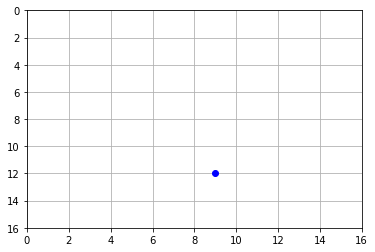

In [18]:
coordinate = hilbert_index2('dcab')

y = coordinate[0]
x = coordinate[1]
plt.plot(x, y, 'ob')
plt.ylim(16,0)
plt.xlim(0,16)
plt.grid(True)

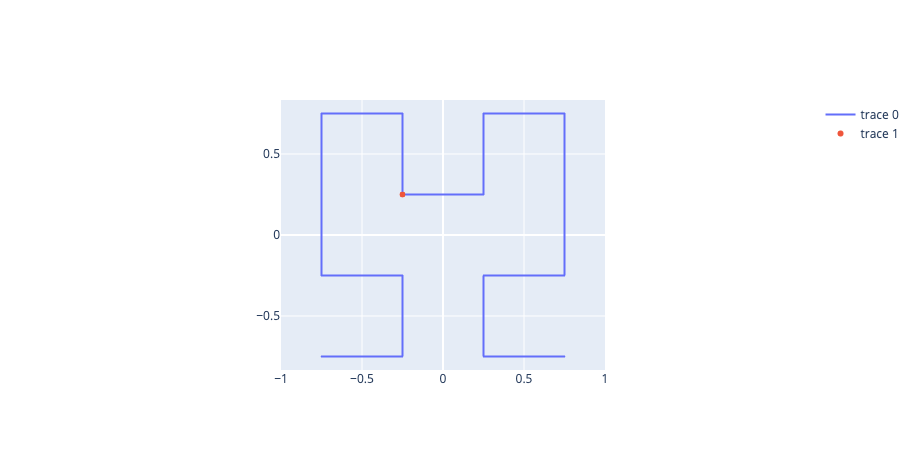

In [48]:
fig = go.Figure()

fig.add_trace(go.Scattergl(x = [-3/4,-1/4,-1/4,-3/4,-3/4,-3/4,-1/4,-1/4,1/4,1/4,3/4,3/4,3/4,1/4,1/4,3/4],
                           y = [-3/4,-3/4,-1/4,-1/4,1/4,3/4,3/4,1/4,1/4,3/4,3/4,1/4,-1/4,-1/4,-3/4,-3/4],
                           mode='lines'))

fig.add_trace(go.Scattergl(x=[-1/4],
                           y=[1/4],
                           mode='markers'))
fig.update_layout(
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1,
    ),
    xaxis = dict(
        range=(-1, 1),
        constrain='domain'
    )
)
fig.show()

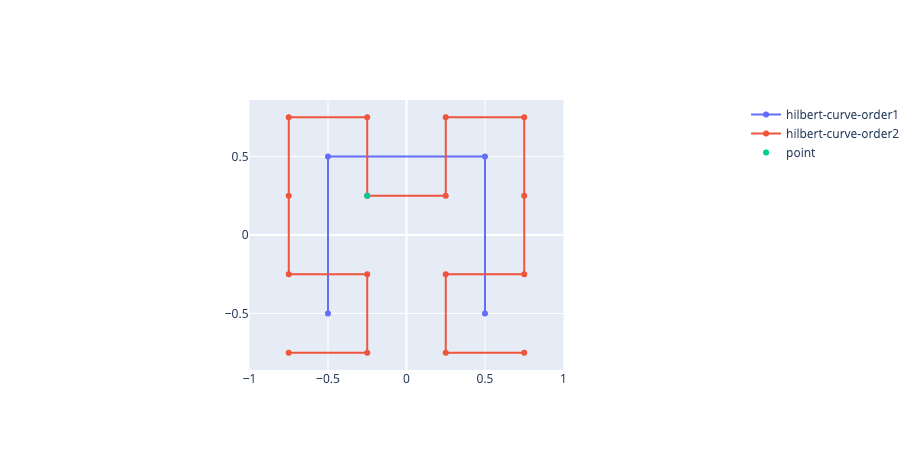

In [54]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = [-1/2,-1/2,1/2,1/2],
                         y = [-1/2,1/2,1/2,-1/2],
                         name='hilbert-curve-order1',
                         mode='lines+markers'))

fig.add_trace(go.Scatter(x = [-3/4,-1/4,-1/4,-3/4,-3/4,-3/4,-1/4,-1/4,1/4,1/4,3/4,3/4,3/4,1/4,1/4,3/4],
                         y = [-3/4,-3/4,-1/4,-1/4,1/4,3/4,3/4,1/4,1/4,3/4,3/4,1/4,-1/4,-1/4,-3/4,-3/4],
                         name='hilbert-curve-order2',
                         mode='lines+markers'))

fig.add_trace(go.Scatter(x=[-1/4],
                         y=[1/4],
                         name='point',
                         mode='markers'))
fig.update_layout(
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1,
    ),
    xaxis = dict(
        range=(-1, 1),
        constrain='domain'
    )
)
fig.show()

In [58]:
class HilberCurveGenerator:
    def __init__(self):
        self.space_alphabet = 'ABCD'
        self.recurrence_matrix = np.array([[0, 3, 2, 1],
                                           [0, 1, 2, 3],
                                           [0, 1, 2, 3],
                                           [2, 1, 0, 3]
                                           ]
                                          )
        self.quad_mappings = {'A': np.array([-1.0, -1.0]),
                              'B': np.array([-1.0, 1.0]),
                              'C': np.array([1.0, 1.0]),
                              'D': np.array([1.0, -1.0])
                              }
        self.dimension_multiplier = 0.5

    def __recurse(self, base_array=None):
        if not base_array:
            base_array = self.space_alphabet

        next_results = []
        # Initial Run?

        if type(base_array) == str:
            base_array = np.array(list(base_array))
            # use idx to lookup reorder opperation to perform of base_array
            for idx, quad in enumerate(base_array):
                reorder_array = self.recurrence_matrix[idx]
                reordered_base = base_array[reorder_array]
                next_result = quad + '|' + ''.join(reordered_base)
                next_results.append(next_result)
        else:
            for quad_data in base_array:
                quad_base, base_array = quad_data.split('|')
                reordered_bases = self.__recurse(base_array=base_array)
                _ = [next_results.append(quad_base + reordered_base)
                     for reordered_base in reordered_bases]
        return next_results

    def __expand_last_recursion(self, quad_values):
        expanded_quads = []
        for quad_data in quad_values:
            quad_base, base_array = quad_data.split('|')
            _ = [expanded_quads.append(quad_base + sub_quad)
                 for sub_quad in base_array]
        return expanded_quads

    def __get_plot_data(self, quad_labels):
        '''Iterate through supplied quad labels sequentially and provide
           x & y coords for plotting x,y in range ]-1.0, 1.0[
        '''
        x_coords, y_coords = [], []
        for quad_label in quad_labels:
            position = None
            for depth, state in enumerate(quad_label):
                if not depth:
                    position = self.dimension_multiplier \
                        * self.quad_mappings[state]
                    continue
                position += (self.dimension_multiplier ** (depth + 1))\
                    * self.quad_mappings[state]

            x_coords.append(position[0])
            y_coords.append(position[1])

        return x_coords, y_coords

    def generate_curve(self, plot_depth, return_plot_data=True):
        trace_data = defaultdict(lambda: defaultdict(lambda: []))

        recursed_data = None

        for depth in range(1, plot_depth):
            if not recursed_data:
                recursed_data = self.__recurse(base_array=self.space_alphabet)
            else:
                recursed_data = self.__recurse(base_array=recursed_data)

            quad_labels = self.__expand_last_recursion(recursed_data)
            '''x_coords, y_coords = \
                self.__get_plot_data(quad_labels=quad_labels)

            trace_data[depth]['labels'] = quad_labels
            if return_plot_data:
                x_coords, y_coords = self.__get_plot_data(quad_labels)
                trace_data[depth]['x_coords'] = x_coords
                trace_data[depth]['y_coords'] = y_coords'''

        return quad_labels


if __name__ == '__main__':
    hc_gen = HilberCurveGenerator()
    hc_seq = hc_gen.generate_curve(plot_depth=2)
    print(hc_seq)

['AA', 'AD', 'AC', 'AB', 'BA', 'BB', 'BC', 'BD', 'CA', 'CB', 'CC', 'CD', 'DC', 'DB', 'DA', 'DD']


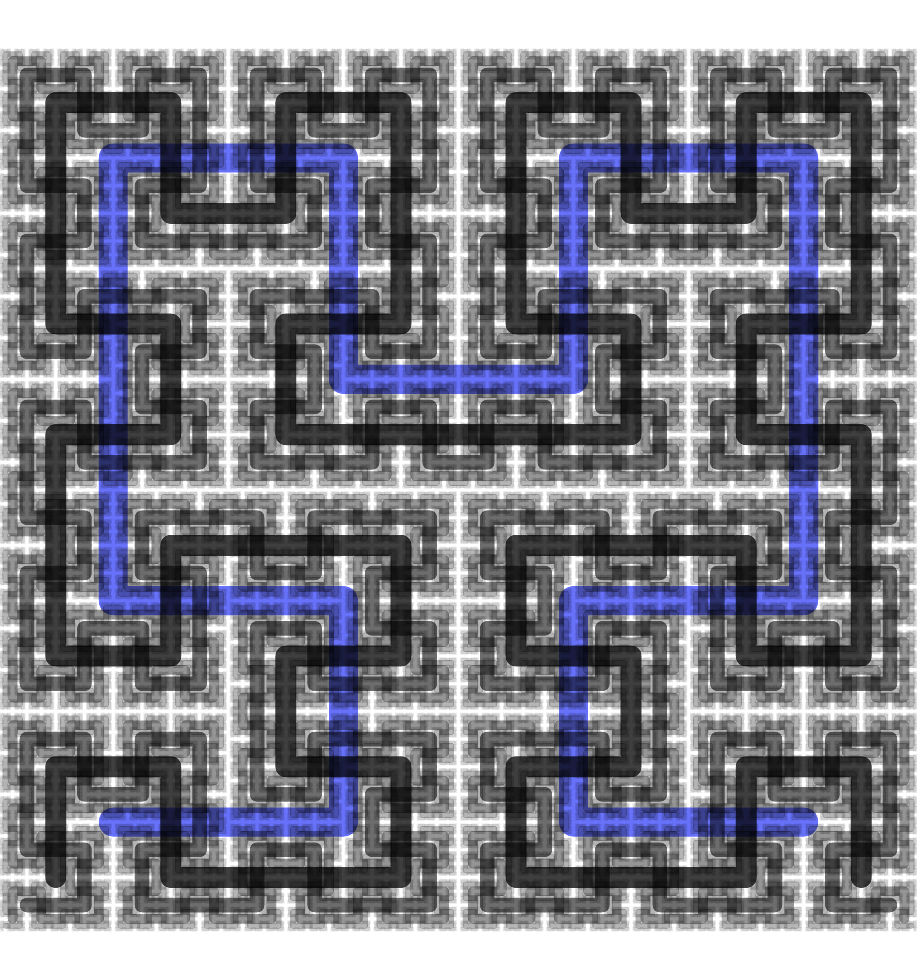

In [44]:
hc_gen = HilberCurveGenerator()
plot_depth=8

# Get plotting Data
trace_data = hc_gen.generate_curve(plot_depth=plot_depth)

fig = go.Figure()
traces = []
plot_depth = plot_depth
for depth, scatter_data in trace_data.items():
    
    # extract data for plotting
    labels = scatter_data['labels']
    traces.append(go.Scattergl(x=scatter_data['x_coords'],
                               y=scatter_data['y_coords'],
                               mode='lines',
                               line_width=6*(plot_depth-depth)/(plot_depth+depth)*np.log((plot_depth-depth+1)**3),
                               opacity=1.25*(plot_depth-depth)/(plot_depth+depth),
                               marker=dict(color= (depth-1)/(plot_depth + depth),
                                           colorscale='viridis'),
                               name=f'Depth = {depth}'))

for trace in traces[::1]:
    fig.add_trace(trace)
    
del traces
    
fig.update_layout(
    autosize=False,
    showlegend=False,
    width=980,
    height=980,
    margin=go.layout.Margin(
        l=0,
        r=0,
        b=0,
        t=0,
        pad=0
    ),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)
fig.update_xaxes(showgrid=False, zeroline=False, showticklabels=False)
fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)
fig.show()